# PGFPlots

This library uses the LaTeX package [pgfplots](http://ctan.org/pkg/pgfplots) to produce plots. It integrates with IJulia, outputting SVG images to the notebook.

## Installation

In [ ]:
Pkg.add("PGFPlots")

In addition, you will need to install the following dependencies if you do not already have them on your system.
* Pdf2svg. This is required by TikzPictures. On Ubuntu, you can get this by running `sudo apt-get install pdf2svg`. On Windows, you can download the binaries from http://www.cityinthesky.co.uk/opensource/pdf2svg/. Be sure to add pdf2svg to your path (and restart).
* Pgfplots (version 1.10 or later). Install using your latex package manager (e.g., texlive or miktex).
* In order to plot contours, you will need [GNUPlot](http://www.gnuplot.info/) installed and on your path.

Once these things are installed, you should be able to run the following:

In [1]:
using PGFPlots

## Examples

### Linear Plots

You can create a very basic plot by passing in vectors of $x$ and $y$ coordinates.

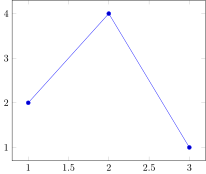

In [2]:
x = [1,2,3]
y = [2,4,1]
plot(x, y)

The version of the plot function above actually just creates an empty Axis and inserts a Plots.Linear instance containing the data.

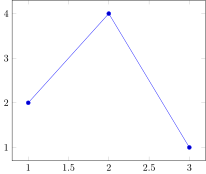

In [3]:
Axis(Plots.Linear(x, y))

If you create the Axis object explicitly, as done above, then you can set various properties of the axis.

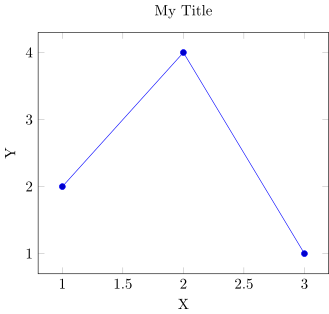

In [4]:
pushPGFPlotsOptions("scale=1.5")
a = Axis(Plots.Linear(x, y), xlabel="X", ylabel="Y", title="My Title")

This will restore the original settings.

In [5]:
popPGFPlotsOptions();

You can set the width and height of the axis.

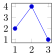

In [6]:
a = Axis(Plots.Linear(x, y), width="3cm", height="3cm")

Since latex is used to typeset everything, you can use any latex math symbols you want. If you use L"..." (as below), you do not have to escape \ and $.

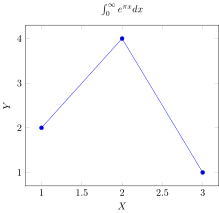

In [7]:
Axis(Plots.Linear(x, y), xlabel=L"$X$", ylabel=L"$Y$", title=L"$\int_0^\infty e^{\pi x}dx$")

You can put multiple plots on the same axis and assign legend entries. You can also pass in functions and their range.

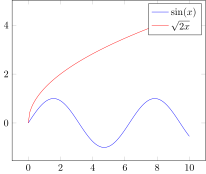

In [8]:
Axis([
    Plots.Linear(sin, (0,10), legendentry=L"$\sin(x)$"),
    Plots.Linear(x->sqrt(2*x), (0,10), legendentry=L"$\sqrt{2x}$")
])

You can change the legend position by setting the legendPos parameter in the axis.

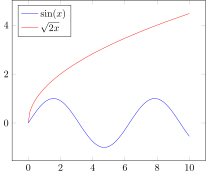

In [9]:
Axis([
    Plots.Linear(sin, (0,10), legendentry=L"$\sin(x)$"),
    Plots.Linear(x->sqrt(2*x), (0,10), legendentry=L"$\sqrt{2x}$")
    ], legendPos="north west")

You can do comb plots by setting the style. The style string gets passed directly into PGFPlots, giving you full control over the plots (see PGFPlots [documentation](http://mirror.utexas.edu/ctan/graphics/pgf/contrib/pgfplots/doc/pgfplots.pdf)).

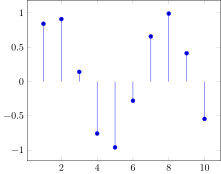

In [10]:
Plots.Linear(1:10, sin(1:10), style="ycomb")

You can also do horizontal comb plots.

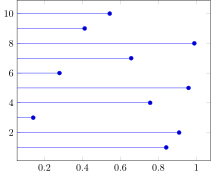

In [11]:
Plots.Linear(abs(sin(1:10)), 1:10, style="xcomb")

You can also make it smooth.

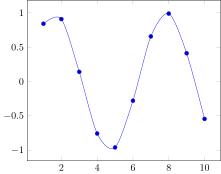

In [12]:
Plots.Linear(1:10, sin(1:10), style="smooth")

There is support for constant plots.

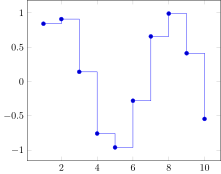

In [13]:
Plots.Linear(1:10, sin(1:10), style="const plot")

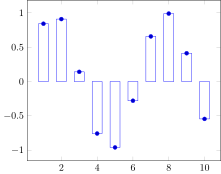

In [14]:
Plots.Linear(1:10, sin(1:10), style="ybar")

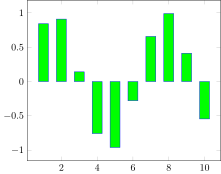

In [15]:
Plots.Linear(1:10, sin(1:10), style="ybar,fill=green", mark="none")

You can give an axis a log scale by specifying xmode or ymode parameters of Axis:

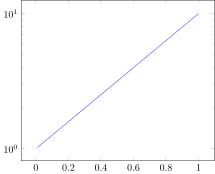

In [16]:
p = Plots.Linear([.01:.01:1], 10.^[.01:.01:1], mark="none")
Axis(p, ymode="log")

Fill and fill opacity can be handled through the style parameter.

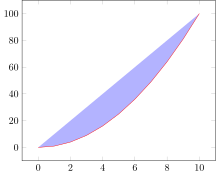

In [17]:
p = Plots.Linear([0:10], [0:10].^2, style="red, fill=blue, fill opacity=0.3", mark="none")

If you want the tick marks to be equal, you can set axisEqual to true (equivalent to axis equal in LaTeX). Note that this will also change the limit sizes, over riding xmax, xmin, ymin, and ymax.

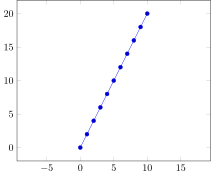

In [18]:
p = Plots.Linear([0:10], 2*[0:10])
a = Axis(p, axisEqual="true", xmin=0, xmax=10)   # note xmin and xmax are disregarded...

If this flippant disregard of your axis limit authority displeases you, you can set axisEqualImage to true (equivalent to axis equal image). This will leave the limits alone, and let you modify them.

In [ ]:
p = Plots.Linear([0:10], 2*[0:10])
a = Axis(p, axisEqualImage="true")

### Histograms

It is very easy to make histograms. It is just another type under the Plots module. You should be able to use autocompletion in your editor (e.g., IJulia or LightTable) to see what Plots are supported.

In [ ]:
d = randn(100)
Axis(Plots.Histogram(d, bins=10), ymin=0)

You can even create a cumulative distribution function from the data.

In [ ]:
Axis(Plots.Histogram(d, bins=20, cumulative=true, density=true), ymin=0)

As with the other plots, you can control the style. The documentation on tikz and pgfplots can give you more information about what styles are supported.

In [ ]:
Axis(Plots.Histogram(d, bins=10, style="red,fill=red!10"), ymin=0, ylabel="Counts")

### Image

Image plots create a PNG bitmap and can be used to visualize functions. The second and third arguments below are tuples specifying the x and y ranges.

In [ ]:
f = (x,y)->x*exp(-x^2-y^2)
Plots.Image(f, (-2,2), (-2,2))

You can set the zmin and zmax. By default, it uses the minimum and maximum values of the data.

In [ ]:
Plots.Image(f, (-2,2), (-2,2), zmin=-1, zmax=1)

You can invert the Gray colormap.

In [ ]:
Plots.Image(f, (-2,2), (-2,2), colormap = ColorMaps.Gray(invert = true))

You can turn off the colorbar.

In [ ]:
Plots.Image(f, (-2,2), (-2,2), colorbar = false)

You can change the colormap.

In [ ]:
Plots.Image(f, (-2,2), (-2,2), colormap = ColorMaps.Distinguishable(3))

In [ ]:
Plots.Image(f, (-2,2), (-2,2), colormap = ColorMaps.Distinguishable(4))

You can use colormap names from the Color.jl package.

In [ ]:
Plots.Image(f, (-2,2), (-2,2), colormap = ColorMaps.Named("Blues"))

You can make a colormap out of any RGB array, such as those created from the Color.jl package.

In [ ]:
using Colors
cm = colormap("RdBu")

In [ ]:
Plots.Image(f, (-2,2), (-2,2), colormap = ColorMaps.RGBArray(cm))

You can also choose the Jet colormap (not currently part of Colors.jl).

In [ ]:
Plots.Image(f, (-2,2), (-2,2), colormap = ColorMaps.Named("Jet"))

### Contour

Contours are produced using an external call to gnuplot, so make sure that it is installed properly. The syntax is similar to that of image.

In [ ]:
Plots.Contour(f, (-2,2), (-2,2))

You can specify the levels explicitly.

In [ ]:
Plots.Contour(f, (-2,2), (-2,2), levels=[-0.4:0.1:4])

You can also just specify the number of contours you want.

In [ ]:
Plots.Contour(f, (-2,2), (-2,2), number=20)

### Quiver

In [ ]:
h(x,y) = [exp(-x^2-y^2)*(1-2*x^2), exp(-x^2-y^2)*(-2*x*y)]
Plots.Quiver(h,(-2,2),(-2,2))

In [ ]:
h(x,y) = [exp(-x^2-y^2)*(1-2*x^2), exp(-x^2-y^2)*(-2*x*y)]
Plots.Quiver(h,(-2,2),(-2,2), style="-stealth'")

By default, the length of the arrows are normalized so that they do not overlap each other. This can be turned off.

In [ ]:
Plots.Quiver(h,(-2,2),(-2,2), normalize=false)

### Group plots

A GroupPlot is just a container for plots. You can specify the number or columns and rows to use.

In [ ]:
# generate 1000 samples
d = randn(1000)
# try out histograms with a variety of different number of bins
bins = [3 10 50 1000]
g = GroupPlot(2,2) # create a 2 x 2 group plot
for i = 1:length(bins)
    push!(g, Axis(Plots.Histogram(d, bins=bins[i]), ymin=0))
end
g

You can set the group style.

In [ ]:
g = GroupPlot(2, 2, groupStyle = "horizontal sep = 3cm") # create a 2 x 2 group plot
for i = 1:length(bins)
    push!(g, Axis(Plots.Histogram(d, bins=bins[i]), ymin=0))
end
g

### Text Nodes

In [ ]:
Axis([
    Plots.Image(f, (-2,2), (-2,2)),
    Plots.Node(L"\sqrt{2}",1,0)        
])

In [ ]:
Axis([
    Plots.Image(f, (-2,2), (-2,2)),
    Plots.Node(L"\sqrt{2}",-1,0,style="yellow"),        
    Plots.Node("Hi there!",1,0,style="right")        
])

### Circles and Ellipses

You can add circles and ellipses to your plots. To add a circle, you must specify the center x-coordinate, the center y-coordinate, and the radius, in that order. To add an ellipse, you must specify the center x-coordinate, the center y-coordinate, the x-radius, and the y-radius.

In [ ]:
p1 = Plots.Circle(5,5,5)
p2 = Plots.Ellipse(5,5,3,5)
a = Axis([p1,p2], xmin=0,ymin=0,xmax=10,ymax=10)

### 3d Plots

You can add 3d plots. To make a 3d plot with a linear scale, use the Linear3 type (equivalent to \addplot3 in PGF).

In [ ]:
t = rad2deg(linspace(0,5pi,60))
x = sind(t)
y = cosd(t)
z = 2t/(5pi)
p = Plots.Linear3(x, y, z, mark="none")
Axis(p, xlabel="x", ylabel="y", zlabel="z")

You can change the view by specifying the view parameter of the Axis type. This is a string representing what you would feed to PGF. The first parameter is the rotation about the azimuth (z-axis). This rotation is applied first. The second argument is the elevation, or the angle rotated about the (rotated) x-axis.

In [ ]:
Axis(p, view="{60}{30}", xlabel="x", ylabel="y", zlabel="z")

### Polar Axes

You can specify a polar axis. In this case, the "x" coordinate corresponds to the angle (in degrees), and the "y" coordinate corresponds to the radius.

In [ ]:
angles = [0,90,180,270]
radii = ones(4)
p = Plots.Linear(angles, radii)
pa = PolarAxis(p)

### Color

You can define your own custom named colors using a variety of methods. You can pass it an array of `FloatingPoint` values in the range $[0,1]$; it uses RGB if there are three values, and it uses CMYK if there are four values.

In [ ]:
define_color("myrgbcolor1", [1,0.2,0.3])
Plots.Linear(x, y, style="myrgbcolor1")

In [ ]:
define_color("mycmykcolor1", [1,0.2,0.3,0])
Plots.Linear(x, y, style="mycmykcolor1")

If you pass in an array of integers (between 0 and 255), then it will use the integer-based RGB color space.

In [ ]:
define_color("myRGBcolor", [82,227,246])
Plots.Linear(x, y, style="myRGBcolor")

If you pass in a single scalar value between 0 and 1, it will interpret as a shade of gray. In this scale, 0 is black and 1 is white.

In [ ]:
define_color("mylightgray", 0.9)
Plots.Linear(x, y, style="mylightgray")

If you pass in a `UInt32`, you will get an HTML color.

In [ ]:
define_color("myhtmlcolor", 0xff7f00)
Plots.Linear(x, y, style="myhtmlcolor")

You can also pass in any color type from the [Colors.jl](https://github.com/JuliaGraphics/Colors.jl) and [ColorTypes.jl](https://github.com/JuliaGraphics/ColorTypes.jl) packages.

In [ ]:
define_color("mycolor", HSV(300, 0.2, 0.9))
Plots.Linear(x, y, style="mycolor, very thick")

### Customizing Preamble 

In order to customize the $\LaTeX$ preamble in the current context, you can call `pushPGFPlotsPreamble`. For example, suppose you want to use the "cmbright package":

In [ ]:
pushPGFPlotsPreamble("\\usepackage{cmbright}")
Plots.Linear(x, y, legendentry = "Test")

To restore things to how they were before, just call `popPGFPlotsPreamble()`.

In [ ]:
popPGFPlotsPreamble()
Plots.Linear(x, y, legendentry = "Test")

### Saving

All of the images above can be saved in tex, pdf, or svg format.

In [ ]:
p = Plots.Histogram(rand(10))
save("myfile.tex", p)
save("myfile.pdf", p)
save("myfile.svg", p)

## Future Plans

Gradually, more and more functionality from pgfplots will be migrated into this package. Eventually, this package will have scatter plots, stacked plots, area plots, etc. It will also eventually expose more control over error bars, tick marks, etc.